In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import copy

font_path = "C:/Windows/Fonts/MALGUN.TTF"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rc('xtick', labelsize=10)
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.shape, test.shape

((2952, 15), (1022, 14))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [5]:
# 오류1번 트레인 셋 처리
# 총세대수와 전용면적별 세대수 합이 다른 단지코드의 값을 -> 전용면적별세대수의 합으로 수정하기

def house_number_correction(df):
    error_1_group = df.groupby("단지코드")[["총세대수"]]
    total_number_house_hold = error_1_group.mean()

    error_2_group = df.groupby("단지코드")["전용면적별세대수"]
    sum_house_hold = error_2_group.sum()

    check_df = pd.concat([total_number_house_hold, sum_house_hold], axis=1)
    different_df = check_df[check_df["총세대수"] != check_df["전용면적별세대수"]]

    total_house_index = different_df.index
    total_house_number = []
    for v in different_df.values:
        total_house_number.append(v[1])
    
    for code, value in zip(total_house_index, total_house_number):
         df.loc[df["단지코드"] == code, "총세대수"] = value
    
    return df

train = house_number_correction(train)
test = house_number_correction(test)

In [6]:
error_1_group = train.groupby("단지코드")[["총세대수"]]
total_number_house_hold = error_1_group.mean()

error_2_group = train.groupby("단지코드")["전용면적별세대수"]
sum_house_hold = error_2_group.sum()

check_df = pd.concat([total_number_house_hold, sum_house_hold], axis=1)
check_df = check_df[check_df["총세대수"] != check_df["전용면적별세대수"]]

print(check_df.shape)
check_df

(0, 2)


,총세대수,전용면적별세대수
단지코드,,


In [7]:
error_1_group = test.groupby("단지코드")[["총세대수"]]
total_number_house_hold = error_1_group.mean()

error_2_group = test.groupby("단지코드")["전용면적별세대수"]
sum_house_hold = error_2_group.sum()

check_df = pd.concat([total_number_house_hold, sum_house_hold], axis=1)
check_df = check_df[check_df["총세대수"] != check_df["전용면적별세대수"]]

check_df.shape

(0, 2)

In [8]:
# 오류2번 3번 처리하기

train[(train["단지코드"] == "C2675") | (train["단지코드"] == "C2335") | (train["단지코드"] == "C1327")]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수


In [9]:
test[(test["단지코드"] == "C2675") | (test["단지코드"] == "C2335") | (test["단지코드"] == "C1327")].head(3)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
579,C2675,512,아파트,경기도,국민임대,36.65,130,9.0,A,18476000,154790,0.0,3.0,1016.0
580,C2675,512,아파트,경기도,국민임대,46.90,44,9.0,A,34082000,232200,0.0,3.0,1016.0
581,C2675,512,아파트,경기도,국민임대,46.90,80,9.0,A,34082000,232200,0.0,3.0,1016.0


In [10]:
# 테스트 데이터 셋에서 세개의 코드 데이터를 없애기 (2, 3번 3개 코드 제거)

error_index = test[(test["단지코드"] == "C2675") | (test["단지코드"] == "C2335") | (test["단지코드"] == "C1327")].index
test = test.drop(index=error_index, axis=0)

In [11]:
# 에러2번의 5개 단지코드 트레인 셋 제거

train_set_error_index = train[(train["단지코드"] =="C2085") | (train["단지코드"] =="C1397") | (train["단지코드"] =="C2431") | (train["단지코드"] =="C1649") | (train["단지코드"] =="C1036")].index
train = train.drop(index=train_set_error_index, axis=0)

In [12]:
# 에러3번의 트레인 셋 7개 단지 코드 제거

train_set_error_index = train[(train["단지코드"] =="C1095") | (train["단지코드"] =="C2051") | (train["단지코드"] =="C1218") | (train["단지코드"] =="C1894") | (train["단지코드"] =="C2483") | (train["단지코드"] =="C1502") | (train["단지코드"] =="C1988")].index
train = train.drop(index=train_set_error_index, axis=0)

In [13]:
# 자격 유형 피처 전처리

test.loc[196, "자격유형"] = "A"
test.loc[258, "자격유형"] = "C"
test.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     38
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

In [14]:
train_df = train.copy(deep=True)
test_df = test.copy(deep=True)

In [15]:
# 임대보증금 피처 전처리
# 임대보증금이 0인 행의 데이터를 -> 트레인 셋의 중앙값으로 치환

all
train_df["임대료"] = train_df["임대료"].fillna(0)
train_df.loc[train_df["임대료"] == "-", "임대료"] = 0
train_df["임대료"] = train_df["임대료"].astype(int)
train_df.loc[train_df["임대료"] == 0, '임대료'] = train_df["임대료"].median()

test_df["임대료"] = test_df["임대료"].fillna(0)
test_df.loc[test_df["임대료"] == "-", "임대료"] = 0
test_df["임대료"] = test_df["임대료"].astype(int)
test_df.loc[test_df["임대료"] == 0, "임대료"] = train_df["임대료"].median()

In [16]:
gr=train_df.groupby("임대보증금")
train_df.loc[train_df["임대보증금"]=='0']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2869 entries, 8 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2869 non-null   object 
 1   총세대수                          2869 non-null   int64  
 2   임대건물구분                        2869 non-null   object 
 3   지역                            2869 non-null   object 
 4   공급유형                          2869 non-null   object 
 5   전용면적                          2869 non-null   float64
 6   전용면적별세대수                      2869 non-null   int64  
 7   공가수                           2869 non-null   float64
 8   자격유형                          2869 non-null   object 
 9   임대보증금                         2300 non-null   object 
 10  임대료                           2869 non-null   int32  
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2662 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2869 non-null   float64
 13  단지내

In [18]:
all_df = pd.concat([train_df, test_df], join='inner')
all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
8,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0
9,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0
10,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0
11,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0
12,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,670,아파트,경상남도,행복주택,36.77,126,38.0,L,-,134300,0.0,1.0,467.0
1018,C2189,378,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0
1019,C2189,378,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0
1020,C2189,378,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0


In [19]:
all_df.loc[ 196, "자격유형"] = 'A'
all_df.loc[ 258, "자격유형"] = 'C'

In [20]:
mapping = { 'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 
            'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 
            'K':11, 'L':12, 'M':13, 'N':14, 'O':15  }

all_df['자격유형'] =all_df['자격유형'].map(mapping).astype(int)

In [21]:
gubun1 = {'아파트':1, '상가':2}
gubun2 = {'경상남도':1, '대전광역시':2, '경기도':3, '전라북도':4, 
          '강원도':5, '광주광역시':6, '충청남도':7, '부산광역시':8, 
          '제주특별자치도':9, '울산광역시':10, '충청북도':11, '전라남도':12, 
          '경상북도':13, '대구광역시':14, '서울특별시':15, '세종특별자치시':16}
gubun3 = {'국민임대':1, '공공임대(50년)':2, '영구임대':3, '임대상가':4, 
          '공공임대(10년)':5, '공공임대(분납)':6, '장기전세':7, '공공분양':8, 
          '행복주택':9, '공공임대(5년)':10}
all_df['임대건물구분_lbl'] = all_df['임대건물구분'].map(gubun1)
all_df['지역_lbl'] = all_df['지역'].map(gubun2)
all_df['공급유형_lbl'] = all_df['공급유형'].map(gubun3)
all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl
8,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,82940,0.0,3.0,624.0,1,1,1
9,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1
10,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1
11,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1
12,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,670,아파트,경상남도,행복주택,36.77,126,38.0,12,-,134300,0.0,1.0,467.0,1,1,9
1018,C2189,378,아파트,전라북도,국민임대,29.19,96,45.0,8,6872000,106400,0.0,2.0,300.0,1,4,1
1019,C2189,378,아파트,전라북도,국민임대,29.19,20,45.0,8,6872000,106400,0.0,2.0,300.0,1,4,1
1020,C2189,378,아파트,전라북도,국민임대,39.45,202,45.0,8,13410000,144600,0.0,2.0,300.0,1,4,1


In [22]:
all_df['단지코드'] = all_df['단지코드'].astype("category")
all_df['단지코드_lbl'] = all_df['단지코드'].cat.codes

### 전용면적을 구간화하기
all_df['전용면적별세대수'] = all_df['전용면적별세대수'].astype('int')

# 전용면적, 공가수, 단지내주차면수
all_df['qcut_총세대수'] = pd.qcut(all_df['총세대수'], 5, labels=False)
all_df.head(10)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl,단지코드_lbl,qcut_총세대수
8,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,82940,0.0,3.0,624.0,1,1,1,492,1
9,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1,492,1
10,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,107130,0.0,3.0,624.0,1,1,1,492,1
11,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1,492,1
12,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,149760,0.0,3.0,624.0,1,1,1,492,1
13,C2515,545,아파트,경상남도,국민임대,51.97,106,17.0,1,23042000,190090,0.0,3.0,624.0,1,1,1,492,1
14,C2515,545,아파트,경상남도,국민임대,51.97,26,17.0,1,23042000,190090,0.0,3.0,624.0,1,1,1,492,1
15,C1407,1216,아파트,대전광역시,국민임대,30.95,288,13.0,1,15620000,127350,1.0,1.0,1285.0,1,2,1,131,3
16,C1407,1216,아파트,대전광역시,국민임대,30.99,68,13.0,1,15620000,127350,1.0,1.0,1285.0,1,2,1,131,3
17,C1407,1216,아파트,대전광역시,국민임대,30.99,34,13.0,1,15620000,127350,1.0,1.0,1285.0,1,2,1,131,3


In [23]:
group1 = ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', 
          'C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 
          'C1584', 'C2298', 'C2225', 'C1218', 'C1970', 'C1732', 'C2433', 'C1894', 'C1156', 'C2142', 
          'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', 
          'C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189' ]

for one1 in group1:
    all_df.loc[ all_df['단지코드'] == one1, "단지코드_Type" ] = 1

In [24]:
group2 =['C1490', 'C2497', 'C2620', 'C1344', 'C1024','C2470', 'C1206', 'C1740', 'C2405', 'C1804']
for one2 in group2:
    all_df.loc[ all_df['단지코드'] == one2, "단지코드_Type" ] = 2

In [25]:
all_df.loc[  all_df['단지코드_Type'].isna(), "단지코드_Type"] = 3
all_df['단지코드_Type'].unique()

array([3., 1., 2.])

In [26]:
all_df["임대보증금"] =all_df["임대보증금"].fillna(0)
all_df.loc[all_df["임대보증금"] == "-", "임대보증금"] = 0
all_df["임대보증금"] = all_df["임대보증금"].astype(int)

In [27]:
all_df["10분 지하철"] =all_df["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].fillna(0)

In [28]:
all_df = all_df.drop("임대건물구분", axis=1)
all_df = all_df.drop("지역", axis=1)
all_df = all_df.drop("공급유형", axis=1)
all_df = all_df.drop("도보 10분거리 내 지하철역 수(환승노선 수 반영)", axis=1)


In [29]:
all_df["임대보증금"].value_counts()

0            767
19819000      25
5787000       23
18726000      23
14418000      23
            ... 
145264000      1
8890000        1
15927000       1
21451000       1
13824000       1
Name: 임대보증금, Length: 1202, dtype: int64

In [30]:
all_df.reset_index(drop=False, inplace=True)

In [31]:
li_st=[]
all_df_0=all_df.loc[all_df['임대보증금']==0]
a=all_df_0.index


In [32]:
all_df_1=all_df.loc[all_df['임대보증금']!=0]
all_df_1.shape

(3110, 18)

In [33]:
all_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3110 entries, 0 to 3876
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   index               3110 non-null   int64   
 1   단지코드                3110 non-null   category
 2   총세대수                3110 non-null   int64   
 3   전용면적                3110 non-null   float64 
 4   전용면적별세대수            3110 non-null   int32   
 5   공가수                 3110 non-null   float64 
 6   자격유형                3110 non-null   int32   
 7   임대보증금               3110 non-null   int32   
 8   임대료                 3110 non-null   int32   
 9   도보 10분거리 내 버스정류장 수  3110 non-null   float64 
 10  단지내주차면수             3110 non-null   float64 
 11  임대건물구분_lbl          3110 non-null   int64   
 12  지역_lbl              3110 non-null   int64   
 13  공급유형_lbl            3110 non-null   int64   
 14  단지코드_lbl            3110 non-null   int16   
 15  qcut_총세대수           3110 non-null   in

In [34]:
all_df_1.columns

Index(['index', '단지코드', '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금',
       '임대료', '도보 10분거리 내 버스정류장 수', '단지내주차면수', '임대건물구분_lbl', '지역_lbl',
       '공급유형_lbl', '단지코드_lbl', 'qcut_총세대수', '단지코드_Type', '10분 지하철'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split
sel = ['전용면적', '공가수', '자격유형','임대료', '지역_lbl',
 '공급유형_lbl']
X = all_df_1[sel]
y = all_df_1['임대보증금']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=0,)

In [36]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [49]:
params ={
    'n_estimators':10,
    'max_depth':12,
    'min_samples_leaf':8 ,
    'min_samples_split':8
}

In [50]:
# rf_reg = RandomForestRegressor()

# rf_reg_tuned = GridSearchCV(estimator=rf_reg,
#                             param_grid=params,
#                             cv=5,
#                             n_jobs=-1,
#                             verbose=2)

# rf_reg_tuned.fit(X_train, y_train)
# rf_reg_tuned.best_estimator_

In [51]:
X_train_df_log = X_train.apply(lambda x: np.log1p(x))
X_test_df_log = X_test.apply(lambda x: np.log1p(x))
y_train_df_log = y_train.apply(lambda x: np.log1p(x))
y_test_df_log = y_test.apply(lambda x: np.log1p(x))
#0과 1사이로 

In [52]:
# for i in range(1,30,1):
model = RandomForestRegressor(n_jobs=-1,random_state=0,n_estimators=40,max_depth=21)
model.fit(X_train_df_log, y_train_df_log)
pred = model.predict(X_test_df_log)

print("학습(score) :", model.score(X_train_df_log, y_train_df_log) )
print("테스트(score) :", model.score(X_test_df_log, y_test_df_log) ) 
mae = mean_absolute_error(pred,y_test_df_log)
np.expm1(pred)

학습(score) : 0.9909629014696602
테스트(score) : 0.9490151783802756


array([1.42501816e+07, 2.47273327e+07, 1.50530688e+07, 2.71027362e+07,
       3.12100000e+07, 4.80763093e+07, 5.08827471e+07, 2.43818667e+07,
       1.61085637e+07, 2.21657748e+07, 2.40011855e+07, 2.67875579e+07,
       1.28743226e+08, 1.63141160e+07, 1.63750963e+07, 1.40212200e+07,
       4.32185900e+07, 3.37140088e+07, 8.16192625e+06, 6.59087575e+07,
       4.52628258e+07, 2.92254945e+07, 2.69345938e+07, 2.33218419e+07,
       3.28028385e+07, 9.23146917e+06, 2.86433521e+07, 1.42592285e+07,
       1.57565209e+07, 3.28028385e+07, 1.19467367e+07, 3.24318982e+07,
       2.43963624e+07, 7.97895233e+06, 1.75096265e+07, 1.24984017e+07,
       2.74154166e+07, 6.63855781e+07, 1.60538469e+07, 2.81670485e+07,
       2.39574737e+07, 1.98935868e+07, 3.11133860e+07, 1.57565209e+07,
       2.04357163e+07, 1.33603024e+07, 2.29965097e+07, 5.77358060e+07,
       1.66880726e+07, 3.16898963e+07, 2.93705102e+07, 1.55569241e+07,
       1.92361322e+07, 1.25001254e+07, 1.61149313e+07, 1.57113095e+07,
      

In [53]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

24986324.29854904

In [41]:
# [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#  '임대료','도보 10분거리 내 버스정류장 수', '단지내주차면수', '지역_lbl','공급유형_lbl',]

In [42]:
a=model.feature_importances_
a

array([0.24806865, 0.03374079, 0.0660532 , 0.47718195, 0.03897517,
       0.13598025])

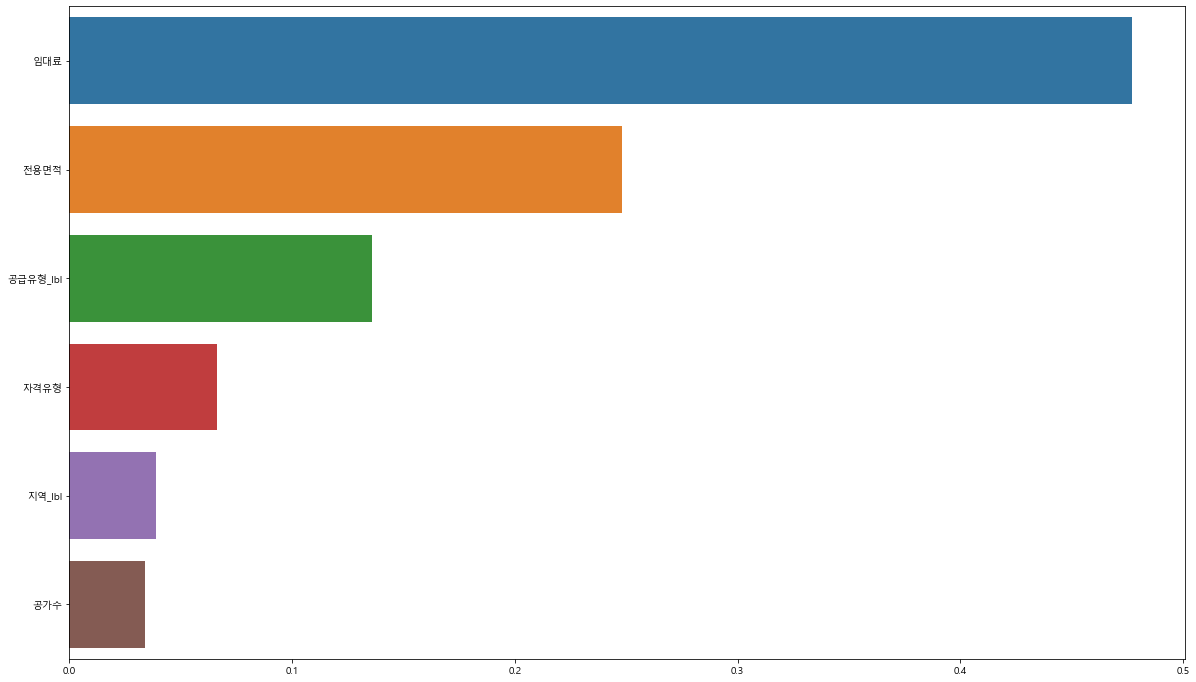

In [43]:
feature_importance = pd.Series(data=a , index=sel)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(20, 12))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.show()

In [44]:
fi_model = RandomForestRegressor(n_jobs=-1,random_state=0,n_estimators=40,max_depth=21)
fi_model.fit(X, y)
pred = fi_model.predict(all_df_0[sel])

In [45]:
len(pred)

767

In [46]:
all_df_0['단지코드']

80      C1925
81      C1925
82      C1925
83      C1925
93      C1874
        ...  
3861    C2152
3869    C1267
3870    C1267
3871    C1267
3872    C1267
Name: 단지코드, Length: 767, dtype: category
Categories (558, object): ['C1000', 'C1003', 'C1004', 'C1005', ..., 'C2680', 'C2688', 'C2691', 'C2692']

In [47]:
data = {"index":all_df_0['index'],"임대보증금":pred}
lease_df = pd.DataFrame(data=data)
lease_df.to_csv("임대보증금.csv", index=False)